# 📉 DIMENSIONALITY REDUCTION

## 🧠 PCA: Principal Component Analysis

- 🔍 **Unsupervised machine learning** algorithm  
- 📦 Used to **reduce the number of features** in a dataset  
- 🔄 Transforms data into a **new coordinate system**  
- 🎯 Goal: Keep as much **variance** as possible with fewer dimensions  

---

## 🔧 What PCA Does:

1. Finds directions (called **principal components**) with the **most data spread**
2. Creates new axes along these directions
3. Projects the original data onto these new axes
4. Selects top components to **reduce dimensions**

➡️ Result: Simpler data with **minimal information loss**


---

## 🧠 TSNE: T-Distribution Stochastic Neighbor Embedding

- T-SNE is a technique used for dimensionality reduction particularly well suited for visualisation.
  High dimensional data in lower dimensional space(usually 2D or 3D)

- T-SNE is a non-linear dimensionality reduction algorithms. 

- It reduce the number of column.

- It reduce the number of column and number of rows remain the same.

- IF I WANT TO REDUCE DIMENSION FROM 100 COLUMNS TO TWO COLUMNS.

### KL Divergence(KULLBACK-LEIBER DIVERGENCE)

- The KL-Divergence is a measure of how different one probability distribution from second.
- The lower the value of the kl distribution closer two distributions are to one another.
- A KL-DIVERGENCE of a implies that the two distribution are identical(same).

---

## ❓ What is a *Linear Orthogonal Transformation*?

👉 It means **rotating and reshaping** the data using straight lines (**linear**)  
   into new axes that are **at 90° angles** to each other (**orthogonal**).

🧠 In simple words:  
**PCA rotates the data** to new directions that are **independent** and capture the most variation.

---


In [31]:
# LOADING DATA SET :
import pandas as pd 
DATA=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\EDA\DATA\OUTLIER_FREE_DATA.csv")

In [32]:
DATA

,event_time,event_type,product_id,category_id,brand,price,user_id,user_session,quantity,ANOMALY_SCORE
0,2019-12-01 00:00:00 UTC,remove_from_cart,5712790,1487580005268456287,f.o.x,6.27,576802932,51d85cb0-897f-48d2-918b-ad63965c12dc,1,1
1,2019-12-01 00:00:00 UTC,view,5764655,1487580005411062629,cnd,29.05,412120092,8adff31e-2051-4894-9758-224bfa8aec18,1,1
2,2019-12-01 00:00:05 UTC,view,5848413,1487580007675986893,freedecor,0.79,348405118,722ffea5-73c0-4924-8e8f-371ff8031af4,1,1
3,2019-12-01 00:00:07 UTC,view,5824148,1487580005511725929,missing,5.56,576005683,28172809-7e4a-45ce-bab0-5efa90117cd5,1,1
4,2019-12-01 00:00:09 UTC,view,5773361,1487580005134238553,runail,2.62,560109803,38cf4ba1-4a0a-4c9e-b870-46685d105f95,1,1
...,...,...,...,...,...,...,...,...,...,...
3013840,2019-12-31 23:59:35 UTC,view,5784043,1487580005754995573,missing,4.92,420652863,546f6af3-a517-4752-a98b-80c4c5860711,1,1
3013841,2019-12-31 23:59:37 UTC,view,5834173,2151191070908613477,runail,2.62,595411904,74ca1cd5-5381-4ffe-b00b-a258b390db77,1,1
3013842,2019-12-31 23:59:39 UTC,view,5683350,1487580005671109489,masura,2.84,536812729,e4a2d47c-a956-4c46-8176-745f52ea664b,1,1
3013843,2019-12-31 23:59:52 UTC,view,5775982,1783999063314661546,missing,11.90,397780878,7e8a2b85-153a-44eb-a71f-b748fde14fcc,1,1


In [33]:
# STANDARDISED DATA :
from sklearn.preprocessing import StandardScaler
STD=StandardScaler()
STANDARD_DATA=STD.fit_transform(DATA.select_dtypes("number"))

In [34]:
STANDARD_DATASET=pd.DataFrame(STANDARD_DATA,columns=DATA.select_dtypes("number").columns)
STANDARD_DATASET

,product_id,category_id,price,user_id,quantity,ANOMALY_SCORE
0,-0.014597,-0.372916,-0.086065,0.630537,-0.172913,0.0
1,0.063662,-0.372916,1.894368,-1.499988,-0.172913,0.0
2,0.190046,-0.372916,-0.562482,-2.324277,-0.172913,0.0
3,0.153432,-0.372916,-0.147791,0.620222,-0.172913,0.0
4,0.076799,-0.372916,-0.403386,0.414575,-0.172913,0.0
...,...,...,...,...,...,...
3013840,0.092917,-0.372916,-0.203431,-1.389598,-0.172913,0.0
3013841,0.168559,4.079374,-0.403386,0.871283,-0.172913,0.0
3013842,-0.059020,-0.372916,-0.384260,0.113178,-0.172913,0.0
3013843,0.080754,1.615815,0.403392,-1.685496,-0.172913,0.0


In [35]:
#  PRINCIPAL COMPONENT ANALYSIS:
from sklearn.decomposition import PCA
PCA=PCA()
PCA_COMPONENT=PCA.fit_transform(STANDARD_DATA)

In [36]:
# PCA COMPONENT ANALYSIS :

VARIENCE=PCA.explained_variance_
VARIENCE_PERCENTAGE=PCA.explained_variance_ratio_

import numpy as np
CUMSUM=np.cumsum(np.round(VARIENCE_PERCENTAGE,decimals=4)*100)

    

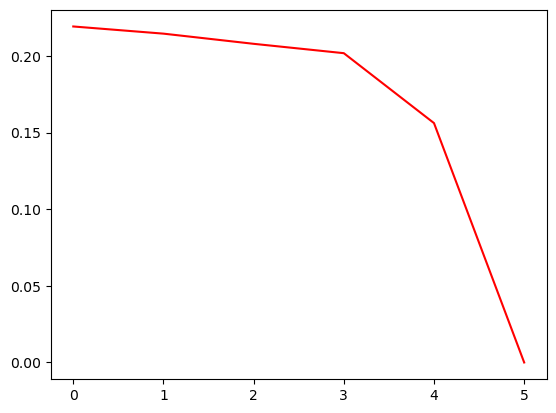

In [37]:
# VARIENCE PLOT FOR PCA COMPONENT:
import matplotlib.pyplot as plt
plt.plot(VARIENCE_PERCENTAGE,color="red")



## 🔢 PCA Only Works with Numerical Data

PCA relies on **variance** and **covariance**, which only make sense for numbers.

---

## 🤔 What About Categorical Columns?

You **can’t directly apply PCA** to categorical features. But you have options:

### 🅰️ Option 1: Drop the categorical columns  
- Use only numerical data for PCA  
- Simple, but may lose valuable information  

### 🅱️ Option 2: Encode them **before** PCA  
- Apply **One-Hot Encoding** or **Label Encoding**  
- ⚠️ One-hot encoding may increase dimensionality too much  
- ⚠️ Label encoding may add false ordinal relationships  

### 🆗 Option 3: Add them **after** PCA ✔️

✅ **Best practice when combining numeric and categorical data:**

1. Split data into:
   - Numerical columns ➡️ for PCA  
   - Categorical columns ➡️ kept aside  
2. Apply PCA to numerical data  
3. Combine:
   - The **PCA-transformed data**  
   - The **original categorical columns**  
4. Encode the categorical columns (if needed)  
5. Use the final dataset for modeling  

---

## 🧪 Summary:

| Step                        | Action                                  |
|-----------------------------|------------------------------------------|
| 1️⃣ Separate                | Numerical vs. Categorical features        |
| 2️⃣ Apply PCA              | On numerical features only                |
| 3️⃣ Combine                | PCA output + categorical features         |
| 4️⃣ Encode categorical     | Use One-Hot or Label Encoding             |
| 5️⃣ Final Dataset          | Ready for training/testing                |

---

✅ This way, PCA reduces complexity while still keeping categorical information.



## TSNE ( T - DISTRIBUTION STOCHASTIC NEIGHBOR EMBEDDING)

In [38]:
# LOADING DATA:
import pandas as pd
DATA=pd.read_csv(r"C:\Users\Nagesh Agrawal\OneDrive\Desktop\EDA\DATA\TSNE_data.csv")
DATA

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
x=DATA.iloc[:,1:]
y=DATA.iloc[:,0]

In [40]:
! pip install manifold

In [41]:
from sklearn.manifold import TSNE
TSNA_DATA=TSNE(n_components=2).fit_transform(x)
TSNA_DATA

array([[ 42.104282 , -12.535738 ],
       [ 42.26981  ,  -9.85052  ],
       [ 37.6618   ,  -9.86557  ],
       ...,
       [ 22.16412  ,  -2.7382157],
       [ 40.147724 ,  -9.924445 ],
       [-38.263714 , -25.200678 ]], dtype=float32)

---

#### 🔍 THE OUTPUT:

* This output shows **co-ordinates** — each representing the **x and y positions** of your data points in a **new 2D space**.
* These coordinates help **visualize relationships** between data points in a **simplified 2D view**.
* It becomes much **easier to spot patterns, clusters, or trends** — like zooming into the true structure of your data!

---


In [42]:
# TSNE DATA VISUALISATION :
! pip install bioinfokit

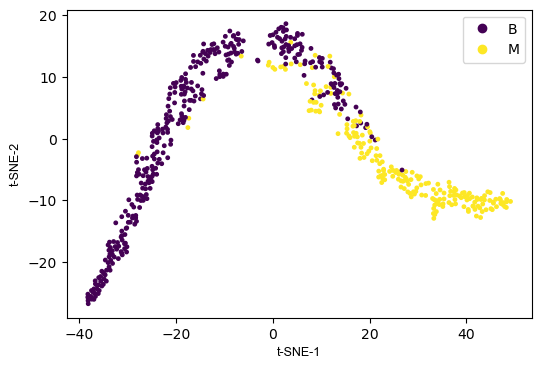

In [52]:
from bioinfokit.visuz import cluster

# Convert class labels to list of strings if needed
color_class = DATA["diagnosis"].to_numpy()
cluster.tsneplot(score=TSNA_DATA,colorlist=color_class,legendpos="upper right",legendanchor=(1,1),show=True)
